In [ ]:
import sys
import os

!git clone https://github.com/IDEA-Research/GroundingDINO
!git clone https://github.com/SysCV/sam-hq/
!pip install -e sam-hq
!pip install -e GroundingDINO
!pip install opencv-python pycocotools matplotlib onnxruntime onnx ipykernel timm
#!wget https://huggingface.co/ShilongLiu/GroundingDINO/resolve/main/groundingdino_swint_ogc.pth
#!wget https://huggingface.co/lkeab/hq-sam/resolve/main/sam_hq_vit_l.pth
!wget https://huggingface.co/ShilongLiu/GroundingDINO/resolve/main/groundingdino_swinb_cogcoor.pth
!wget https://huggingface.co/lkeab/hq-sam/resolve/main/sam_hq_vit_h.pth
!mkdir pretrained_checkpoint
!mv sam_hq_vit_h.pth pretrained_checkpoint
sys.path.append(os.path.join(os.getcwd(), "GroundingDINO"))
sys.path.append(os.path.join(os.getcwd(), "sam-hq"))

Cloning into 'GroundingDINO'...
remote: Enumerating objects: 421, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 421 (delta 143), reused 127 (delta 127), pack-reused 233
Receiving objects: 100% (421/421), 12.85 MiB | 18.59 MiB/s, done.
Resolving deltas: 100% (215/215), done.
Cloning into 'sam-hq'...
remote: Enumerating objects: 443, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 443 (delta 105), reused 76 (delta 66), pack-reused 262
Receiving objects: 100% (443/443), 42.16 MiB | 28.57 MiB/s, done.
Resolving deltas: 100% (202/202), done.
Obtaining file:///content/sam-hq
  Preparing metadata (setup.py) ... done
  Running setup.py develop for segment-anything
Obtaining file:///content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import random
import torch
import torchvision
from PIL import Image, ImageDraw, ImageFont, ImageChops

# Grounding DINO
import GroundingDINO.groundingdino.datasets.transforms as T
from GroundingDINO.groundingdino.models import build_model
from GroundingDINO.groundingdino.util.slconfig import SLConfig
from GroundingDINO.groundingdino.util.utils import clean_state_dict, get_phrases_from_posmap

# segment anything
from segment_anything import build_sam_vit_h, build_sam_vit_l, SamPredictor
import numpy as np

device = 'cuda:0'
sam_checkpoint = 'pretrained_checkpoint/sam_hq_vit_h.pth'
config_file = 'GroundingDINO/groundingdino/config/GroundingDINO_SwinB_cfg.py'
ckpt_filenmae = "groundingdino_swinb_cogcoor.pth"



def load_model(model_config_path, model_checkpoint_path, device):
    args = SLConfig.fromfile(model_config_path)
    args.device = device
    model = build_model(args)
    checkpoint = torch.load(model_checkpoint_path, map_location="cpu")
    load_res = model.load_state_dict(
        clean_state_dict(checkpoint["model"]), strict=False)
    print(load_res)
    _ = model.eval()
    return model


sam = build_sam_vit_h(checkpoint=sam_checkpoint) if 'vit_h' in sam_checkpoint else build_sam_vit_l(checkpoint=sam_checkpoint)
sam.to(device=device)
sam_predictor = SamPredictor(sam)


groundingdino_model = load_model(
            config_file, ckpt_filenmae, device=device)


/content/sam-hq/segment_anything/modeling/tiny_vit_sam.py:662: UserWarning: Overwriting tiny_vit_5m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/content/sam-hq/segment_anything/modeling/tiny_vit_sam.py:662: UserWarning: Overwriting tiny_vit_11m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/content/sam-hq/segment_anything/modeling/tiny_vit_sam.py:662: UserWarning: Overwriting tiny_vit_21m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_21m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/content/sam-hq/se

<All keys matched successfully>


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

_IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


In [ ]:
def draw_mask(mask, draw, random_color=False):
    if random_color:
        color = (random.randint(0, 255), random.randint(
            0, 255), random.randint(0, 255), 153)
    else:
        color = (30, 144, 255, 153)

    nonzero_coords = np.transpose(np.nonzero(mask))

    for coord in nonzero_coords:
        draw.point(coord[::-1], fill=color)


def draw_box(box, draw, label):
    # random color
    color = tuple(np.random.randint(0, 255, size=3).tolist())

    draw.rectangle(((box[0], box[1]), (box[2], box[3])),
                   outline=color,  width=2)

    if label:
        font = ImageFont.load_default()
        if hasattr(font, "getbbox"):
            bbox = draw.textbbox((box[0], box[1]), str(label), font)
        else:
            w, h = draw.textsize(str(label), font)
            bbox = (box[0], box[1], w + box[0], box[1] + h)
        draw.rectangle(bbox, fill=color)
        draw.text((box[0], box[1]), str(label), fill="white")

        draw.text((box[0], box[1]), label)

def get_grounding_output(model, image, caption, box_threshold, text_threshold, with_logits=True):
    caption = caption.lower()
    caption = caption.strip()
    if not caption.endswith("."):
        caption = caption + "."

    with torch.no_grad():
        outputs = model(image[None], captions=[caption])
    logits = outputs["pred_logits"].cpu().sigmoid()[0]  # (nq, 256)
    boxes = outputs["pred_boxes"].cpu()[0]  # (nq, 4)
    logits.shape[0]

    # filter output
    logits_filt = logits.clone()
    boxes_filt = boxes.clone()
    filt_mask = logits_filt.max(dim=1)[0] > box_threshold
    logits_filt = logits_filt[filt_mask]  # num_filt, 256
    boxes_filt = boxes_filt[filt_mask]  # num_filt, 4
    logits_filt.shape[0]

    # get phrase
    tokenlizer = model.tokenizer
    tokenized = tokenlizer(caption)
    # build pred
    pred_phrases = []
    scores = []
    for logit, box in zip(logits_filt, boxes_filt):
        pred_phrase = get_phrases_from_posmap(
            logit > text_threshold, tokenized, tokenlizer)
        if with_logits:
            pred_phrases.append(
                pred_phrase + f"({str(logit.max().item())[:4]})")
        else:
            pred_phrases.append(pred_phrase)
        scores.append(logit.max().item())

    return boxes_filt, torch.Tensor(scores), pred_phrases

def transform_image(image_pil):

    transform = T.Compose(
        [
            T.RandomResize([800], max_size=1333),
            T.ToTensor(),
            T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    )
    image, _ = transform(image_pil, None)  # 3, h, w
    return image


def run_grounded_sam(img_path, text_prompt, box_threshold=0.3, text_threshold=0.25, iou_threshold=0.8, hq_token_only=True):

    image_pil = Image.open(img_path).convert("RGB")
    transformed_image = transform_image(image_pil)

    boxes_filt, scores, pred_phrases = get_grounding_output(
        groundingdino_model, transformed_image, text_prompt, box_threshold, text_threshold
    )

    size = image_pil.size

    # process boxes
    H, W = size[1], size[0]
    for i in range(boxes_filt.size(0)):
        boxes_filt[i] = boxes_filt[i] * torch.Tensor([W, H, W, H])
        boxes_filt[i][:2] -= boxes_filt[i][2:] / 2
        boxes_filt[i][2:] += boxes_filt[i][:2]

    boxes_filt = boxes_filt.cpu()

    # nms
    print(f"Before NMS: {boxes_filt.shape[0]} boxes")
    nms_idx = torchvision.ops.nms(
        boxes_filt, scores, iou_threshold).numpy().tolist()
    boxes_filt = boxes_filt[nms_idx]
    pred_phrases = [pred_phrases[idx] for idx in nms_idx]
    print(f"After NMS: {boxes_filt.shape[0]} boxes")


    image = np.array(image_pil)
    sam_predictor.set_image(image)

    hq_token_only = (hq_token_only == 'True')

    transformed_boxes = sam_predictor.transform.apply_boxes_torch(boxes_filt, image.shape[:2]).to(device)

    masks, _, _ = sam_predictor.predict_torch(
        point_coords=None,
        point_labels=None,
        boxes=transformed_boxes,
        multimask_output=False,
        hq_token_only=hq_token_only,
    )

    # masks: [1, 1, 512, 512]
    mask_image = Image.new('RGBA', size, color=(0, 0, 0, 0))
    mask_draw = ImageDraw.Draw(mask_image)
    for mask in masks:
        draw_mask(mask[0].cpu().numpy(), mask_draw, random_color=True)
    image_draw = ImageDraw.Draw(image_pil)

    for box, label in zip(boxes_filt, pred_phrases):
        draw_box(box, image_draw, label)

    return image_pil, mask_image


Before NMS: 1 boxes
After NMS: 1 boxes


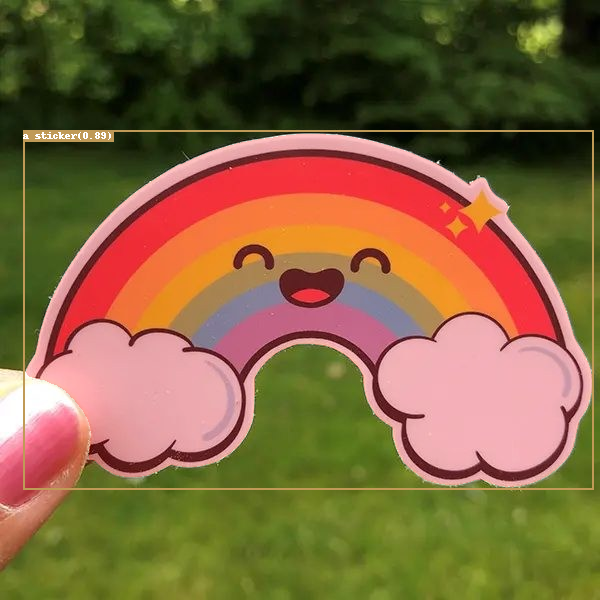

In [ ]:
out = run_grounded_sam('/content/large-fbkcrs.jpg', 'a sticker', box_threshold=0.3, text_threshold=0.25, iou_threshold=0.8)
img = out[0]
mask = out[1]
inverted_mask = ImageChops.invert(mask)
bg = Image.new('RGB', mask.size, 'red')
bg.paste(img, mask=inverted_mask)

result = Image.composite(img, bg, mask)
result